In [1]:
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import seaborn as sns

import scienceplots
#plt.style.use(['science', 'ieee', 'notebook'])

In [2]:
binary = os.path.join(os.getcwd(), 'data', 'volve_compiled.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    data = pickle.load(bin_file)

/mnt/d/OneDrive/Mestrado/Semestre 02/SYSID/SYSID_Trabalho/Volve-Dataset/data/volve_compiled.pkl


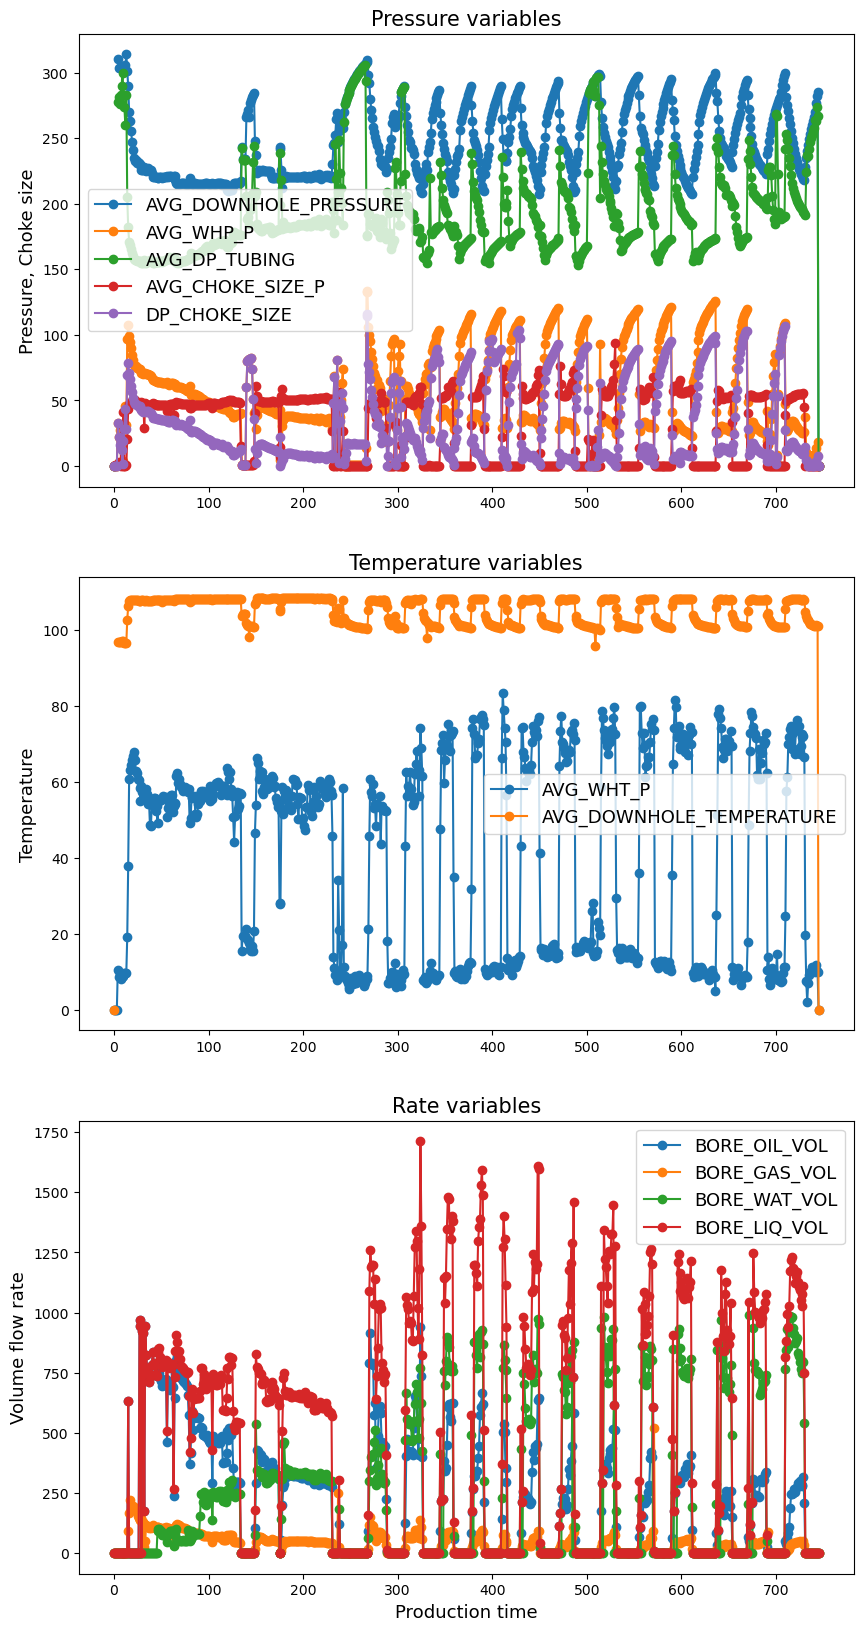

In [4]:
case = "15/9-F-1 C"
#case = "15/9-F-11"

data_case = data['OP'][case]

filt_vars_IN_Q =  [
        'BORE_OIL_VOL',
        'BORE_GAS_VOL',
        'BORE_WAT_VOL',
        #'BORE_OIL_CUM',
        #'BORE_LIQ_CUM',
        #'BORE_GAS_CUM',
        #'BORE_WAT_CUM',
]

filt_vars_IN_QINJ = [
        #'BORE_WI_VOL',
        #'BORE_WI_CUM',
]

filt_vars_IN_P = [
        'AVG_DOWNHOLE_PRESSURE',
        'AVG_WHP_P',
        'AVG_DP_TUBING',
        #'AVG_ANNULUS_PRESS',
        'AVG_CHOKE_SIZE_P',
        'DP_CHOKE_SIZE',
]

filt_vars_IN_T = [
        'AVG_WHT_P',
        'AVG_DOWNHOLE_TEMPERATURE',
]

filt_vars_OUT = [
        'BORE_OIL_VOL',
        'BORE_GAS_VOL',
        'BORE_WAT_VOL',
        'BORE_LIQ_VOL',
]

time = data_case['N']
fig, ax = plt.subplots(3,1, figsize=(10, 20))
for var in filt_vars_IN_P:
    ax[0].plot(time, data_case[var], '-o', label=var)
for var in filt_vars_IN_T:
    ax[1].plot(time, data_case[var], '-o', label=var)
for var in filt_vars_OUT:
    ax[2].plot(time, data_case[var], '-o', label=var)
#for var in filt_vars_OUT:
#    ax[3].plot(time, data_case[var], '-o', label=var)
title_font = 15
label_font = 13
ax[0].set_title(f'Pressure variables', fontsize=title_font)
ax[1].set_title(f'Temperature variables', fontsize=title_font)
ax[2].set_title(f'Rate variables', fontsize=title_font)
ax[0].set_ylabel('Pressure, Choke size', fontsize=label_font)
ax[1].set_ylabel('Temperature', fontsize=label_font)
ax[2].set_ylabel('Volume flow rate', fontsize=label_font)
ax[2].set_xlabel('Production time', fontsize=label_font)
ax[0].legend(fontsize=label_font)
ax[1].legend(fontsize=label_font)
ax[2].legend(fontsize=label_font)

fig.savefig('outputs/data_example.pdf',  bbox_inches = "tight")

In [4]:
prefix = 'SISO.W1'
binary = os.path.join(os.getcwd(), 'outputs', f'{prefix}_ml.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    X1_tr, y_tr, X1_te, y_te, results, order_progression = pickle.load(bin_file)

/mnt/d/OneDrive/Mestrado/Semestre 02/SYSID/SYSID_Trabalho/Volve-Dataset/outputs/SISO.W1_ml.pkl


/home/pedro-linux/miniconda3/envs/ml_article/lib/python3.9/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.1.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedro-linux/miniconda3/envs/ml_article/lib/python3.9/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator LinearRegression from version 1.1.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedro-linux/miniconda3/envs/ml_article/lib/python3.9/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 1.1.2 when

In [5]:
model_pars = []
best_pars = []
yhats = []
lags = []
for index, row in pd.DataFrame(results).iloc[2:,:].iterrows():
    yhats.append([f"{row['MODEL']}.{prefix}",row['MODEL OBJ'].predict(X1_te, y_te),row['MODEL OBJ'].predict(X1_te, y_te, steps_ahead=1)])
    try:
        model_pars.append((f"{row['MODEL']}.{prefix}", row['MODEL OBJ'].estimator.cv_results_))
        best_pars.append((f"{row['MODEL']}.{prefix}", row['MODEL OBJ'].estimator.best_params_))
        lags.append((f"{row['MODEL']}.{prefix}", row['MODEL OBJ'].nX))
    except Exception as e: 
        print(e)


In [6]:
prefix = 'MISO.W1'
binary = os.path.join(os.getcwd(), 'outputs', f'{prefix}_ml.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    X1_tr, y_tr, X1_te, y_te, results, order_progression = pickle.load(bin_file)

/mnt/d/OneDrive/Mestrado/Semestre 02/SYSID/SYSID_Trabalho/Volve-Dataset/outputs/MISO.W1_ml.pkl


/home/pedro-linux/miniconda3/envs/ml_article/lib/python3.9/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.1.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedro-linux/miniconda3/envs/ml_article/lib/python3.9/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator LinearRegression from version 1.1.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedro-linux/miniconda3/envs/ml_article/lib/python3.9/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 1.1.2 when

In [7]:
for index, row in pd.DataFrame(results).iloc[2:,:].iterrows():
    yhats.append([f"{row['MODEL']}.{prefix}",row['MODEL OBJ'].predict(X1_te, y_te),row['MODEL OBJ'].predict(X1_te, y_te, steps_ahead=1)])
    try:
        model_pars.append((f"{row['MODEL']}.{prefix}", row['MODEL OBJ'].estimator.cv_results_))
        best_pars.append((f"{row['MODEL']}.{prefix}", row['MODEL OBJ'].estimator.best_params_))
        lags.append((f"{row['MODEL']}.{prefix}", row['MODEL OBJ'].nX))
    except Exception as e: 
        print(e)

In [8]:
cv_errors = {
    'MODEL' : [],
    'INPUTS': [],
    'SPLIT' : [],
    'R2 SCORE': [],
            }

mlp_data = {
    'INPUTS' : [],
    'R2 MEAN SCORE' : [],
    'R2 STD DEV' : []
    }

times = {
    'MODEL':[],
    'INPUTS': [],
    'TIME MEAN' :[],
    'TIME STD': []
}
for model, model_par in model_pars:
    if 'MLP' in model:
        r2_scores = model_par['mean_test_score'].tolist()
        r2_scores_std = model_par['std_test_score'].tolist()
        n_r2 = len(r2_scores)
        mlp_data['INPUTS'].extend([model.split('.')[1]]*n_r2)
        mlp_data['R2 MEAN SCORE'].extend(r2_scores)
        mlp_data['R2 STD DEV'].extend(r2_scores_std)
    best_model = np.where(model_par['rank_test_score'] == 1)[0]
    times['MODEL'].append(model.split('.')[0])
    times['INPUTS'].append(model.split('.')[1])
    times['TIME MEAN'].append(model_par['mean_fit_time'][best_model][0])
    times['TIME STD'].append(model_par['std_fit_time'][best_model][0])
    for key in model_par.keys():
        if 'split' in key and '_test_score' in key:
            cv_errors['MODEL'].append(model.split('.')[0])
            cv_errors['INPUTS'].append(model.split('.')[1])
            cv_errors['SPLIT'].append(int(key.split('_')[0][5:]))
            cv_errors['R2 SCORE'].append(model_par[key][best_model][0])
        elif 'MLP' in model and 'param_' in key:
            pname = key[6:]
            if not pname in mlp_data.keys():
                try:
                    mlp_data[pname] = model_par[key].tolist()
                except Exception:
                    mlp_data[pname] = model_par[key]
            else:
                try:
                    mlp_data[pname].extend(model_par[key].tolist())
                except Exception:
                    mlp_data[pname].extend(model_par[key])
            
            

cv_errors = pd.DataFrame(cv_errors)
mlp_data['hidden_layers'] = [len(x) for x in mlp_data['hidden_layer_sizes']]
mlp_data['total_hidden_units'] = [np.sum(x) for x in mlp_data['hidden_layer_sizes']]
mlp_data = pd.DataFrame(mlp_data)
mlp_data.drop(columns=['activation', 'max_iter', 'solver'], inplace=True)
display(mlp_data)

INPUTS  R2 MEAN SCORE  R2 STD DEV     alpha  batch_size  early_stopping  \
0     SISO       0.702249    0.057943  0.030304         256           False   
1     SISO       0.772532    0.055266  0.034329          32            True   
2     SISO       0.725963    0.064230  0.086851         128           False   
3     SISO       0.756539    0.074461  0.004190          32           False   
4     SISO       0.757736    0.063278  0.001361          32            True   
..     ...            ...         ...       ...         ...             ...   
195   MISO       0.695150    0.066496  0.348421          32           False   
196   MISO       0.742038    0.064623  0.000114          64           False   
197   MISO       0.776016    0.065690  0.053043          32           False   
198   MISO       0.734673    0.071726  0.023639         256           False   
199   MISO       0.765646    0.071471  0.043703          64           False   

    hidden_layer_sizes           tol  hidden_layers  total_hidden_units  
0    (80, 40, 40, 100)  3.019659e-03              4                 260  
1     (80, 80, 20, 20)  1.643129e-05              4                 200  
2    (20, 100, 40, 60)  2.306157e-06              4                 220  
3        (60, 40, 100)  1.917448e-06              3                 200  
4            (60, 100)  3.058823e-04              2                 160  
..                 ...           ...            ...                 ...  
195  (100, 60, 60, 20)  2.154966e-02              4                 240  
196   (20, 80, 60, 60)  1.092597e-06              4                 220  
197  (100, 60, 40, 80)  1.110901e-05              4                 280  
198   (80, 80, 60, 40)  8.299463e-07              4                 260  
199       (40, 80, 40)  1.633811e-05              3                 160  

[200 rows x 10 columns]

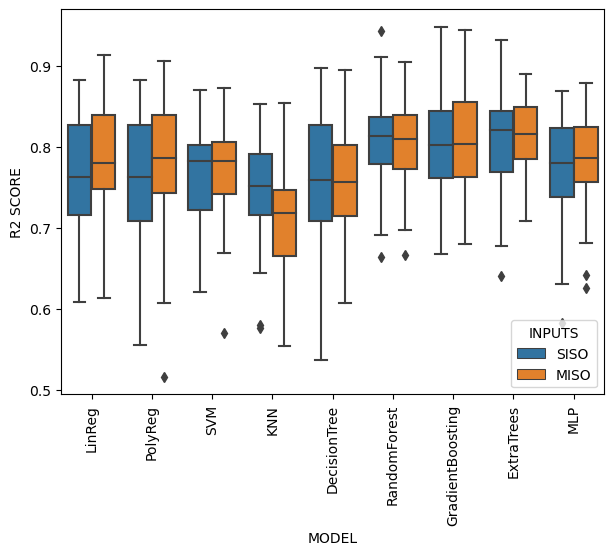

In [9]:
#plt.style.use(['science', 'ieee', 'notebook'])
cv_errors_filt = cv_errors[
    (cv_errors.MODEL == 'LinReg')|
    (cv_errors.MODEL == 'PolyReg')|
    (cv_errors.MODEL == 'MLP')
]
fig, axs = plt.subplots(1,1, figsize=(7,5))
sns.boxplot(data=cv_errors, x='MODEL', y='R2 SCORE', hue='INPUTS', ax=axs)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
fig.savefig('./outputs/boxplot_cv.pdf', bbox_inches = "tight")

In [10]:
pd.DataFrame(times)

MODEL INPUTS  TIME MEAN  TIME STD
0             LinReg   SISO   0.001091  0.000232
1            PolyReg   SISO   0.001529  0.000289
2                SVM   SISO   0.004185  0.000827
3                KNN   SISO   0.000348  0.000185
4       DecisionTree   SISO   0.001255  0.000277
5       RandomForest   SISO   0.140784  0.014172
6   GradientBoosting   SISO   0.809433  0.043521
7         ExtraTrees   SISO   0.087529  0.012133
8                MLP   SISO   0.479718  0.253256
9             LinReg   MISO   0.001315  0.000217
10           PolyReg   MISO   0.036452  0.014905
11               SVM   MISO   0.006312  0.001225
12               KNN   MISO   0.000818  0.000858
13      DecisionTree   MISO   0.001265  0.000303
14      RandomForest   MISO   0.191897  0.030525
15  GradientBoosting   MISO   1.377703  0.087340
16        ExtraTrees   MISO   0.110058  0.013610
17               MLP   MISO   0.367222  0.128127

LinReg.SISO.W1
R2 Train (OSA): 0.7737664713838261
R2 Test (OSA): 0.7756246840150631
R2 Full  (OSA): 0.7763265124528665
R2 Train (FS):  0.3712758916790264
R2 Test (FS):  0.4283372663794476
R2 Full  (FS):  0.3960504082840639
RMSE Train (OSA): 0.12551809732214314
RMSE Test (OSA): 0.1377551893920894
RMSE Full  (OSA): 0.12932128524742822
RMSE Train (FS):  0.2092463636721591
RMSE Test (FS):  0.21988235021653052
RMSE Full  (FS):  0.21250203994029113
PolyReg.SISO.W1
R2 Train (OSA): 0.7737664713838261
R2 Test (OSA): 0.7756246840150631
R2 Full  (OSA): 0.7763265124528665
R2 Train (FS):  0.3712758916790264
R2 Test (FS):  0.4283372663794476
R2 Full  (FS):  0.3960504082840639
RMSE Train (OSA): 0.12551809732214314
RMSE Test (OSA): 0.1377551893920894
RMSE Full  (OSA): 0.12932128524742822
RMSE Train (FS):  0.2092463636721591
RMSE Test (FS):  0.21988235021653052
RMSE Full  (FS):  0.21250203994029113
SVM.SISO.W1
R2 Train (OSA): 0.8131516984901832
R2 Test (OSA): 0.7694132959590332
R2 Full  (OSA): 0.799860

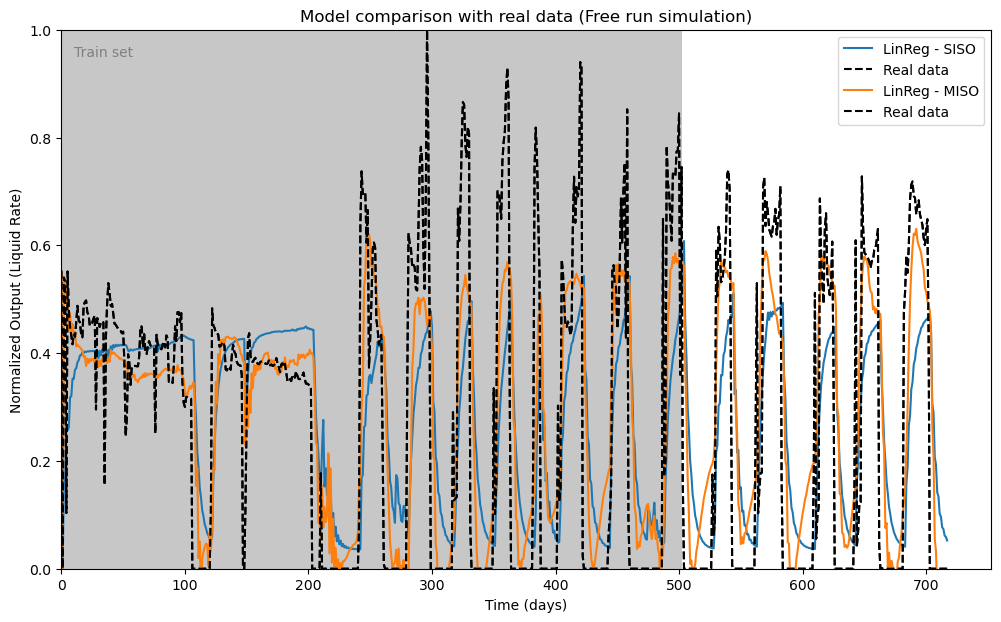

In [11]:
errors = {
    'MODEL':[],
    'INPUTS':[],
    'R2 OSA TRAIN':[],
    'R2 OSA TEST':[],
    'R2 OSA TOTAL':[],
    'R2 FS TRAIN':[],
    'R2 FS TEST':[],
    'R2 FS TOTAL':[],
    'RMSE OSA TRAIN':[],
    'RMSE OSA TEST':[],
    'RMSE OSA TOTAL':[],
    'RMSE FS TRAIN':[],
    'RMSE FS TEST':[],
    'RMSE FS TOTAL':[],
    }

fig, ax   = plt.subplots(1,1, figsize=(12,7))
for model, yhat, yhat_OSA in yhats:
    model_name = model.split('.')[0]
    model_input = model.split('.')[1]
    errors['MODEL'].append(model_name)
    errors['INPUTS'].append(model_input)
    #if not model_name in ['PolyReg', 'LinReg', 'MLP']: continue
    print(model)
    print('R2 Train (OSA):', r2_score(y_te.ravel()[:502], yhat_OSA.ravel()[:502]))
    errors['R2 OSA TRAIN'].append(r2_score(y_te.ravel()[:502], yhat_OSA.ravel()[:502]))
    print('R2 Test (OSA):', r2_score(y_te.ravel()[502:], yhat_OSA.ravel()[502:]))
    errors['R2 OSA TEST'].append(r2_score(y_te.ravel()[502:], yhat_OSA.ravel()[502:]))
    print('R2 Full  (OSA):', r2_score(y_te.ravel(), yhat_OSA.ravel()))
    errors['R2 OSA TOTAL'].append(r2_score(y_te.ravel(), yhat_OSA.ravel()))
    print('R2 Train (FS): ', r2_score(y_te.ravel()[:502], yhat.ravel()[:502]))
    errors['R2 FS TRAIN'].append(r2_score(y_te.ravel()[:502], yhat.ravel()[:502]))
    print('R2 Test (FS): ', r2_score(y_te.ravel()[502:], yhat.ravel()[502:]))
    errors['R2 FS TEST'].append(r2_score(y_te.ravel()[502:], yhat.ravel()[502:]))
    print('R2 Full  (FS): ', r2_score(y_te.ravel(), yhat.ravel()))
    errors['R2 FS TOTAL'].append(r2_score(y_te.ravel()[:], yhat.ravel()[:]))
    print('RMSE Train (OSA):', mean_squared_error(y_te.ravel()[:502], yhat_OSA.ravel()[:502])**0.5)
    errors['RMSE OSA TRAIN'].append(mean_squared_error(y_te.ravel()[:502], yhat_OSA.ravel()[:502])**0.5)
    print('RMSE Test (OSA):', mean_squared_error(y_te.ravel()[502:], yhat_OSA.ravel()[502:])**0.5)
    errors['RMSE OSA TEST'].append(mean_squared_error(y_te.ravel()[502:], yhat_OSA.ravel()[502:])**0.5)
    print('RMSE Full  (OSA):', mean_squared_error(y_te.ravel(), yhat_OSA.ravel())**0.5)
    errors['RMSE OSA TOTAL'].append(mean_squared_error(y_te.ravel()[:], yhat_OSA.ravel()[:])**0.5)
    print('RMSE Train (FS): ', mean_squared_error(y_te.ravel()[:502], yhat.ravel()[:502])**0.5)
    errors['RMSE FS TRAIN'].append(mean_squared_error(y_te.ravel()[:502], yhat.ravel()[:502])**0.5)
    print('RMSE Test (FS): ', mean_squared_error(y_te.ravel()[502:], yhat.ravel()[502:])**0.5)
    errors['RMSE FS TEST'].append(mean_squared_error(y_te.ravel()[502:], yhat.ravel()[502:])**0.5)
    print('RMSE Full  (FS): ', mean_squared_error(y_te.ravel(), yhat.ravel())**0.5)
    errors['RMSE FS TOTAL'].append(mean_squared_error(y_te.ravel()[:], yhat.ravel()[:])**0.5)
    if not 'LinReg' in model: continue
    ax.plot(yhat, label=' - '.join(model.split('.')[:-1]))
    ax.plot(y_te, 'k--', label='Real data')
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Normalized Output (Liquid Rate)')
    ax.set_title('Model comparison with real data (Free run simulation)')
    ax.fill_between(np.arange(0, len(yhat)), 0, 1, where = np.arange(0, len(yhat))<=502,
                facecolor ='grey', alpha = 0.25)
ax.legend()
ax.set_xlim(0,None)
ax.set_ylim(0,1)
ax.text(10, 0.95, 'Train set', color='grey')
fig.savefig(f'./outputs/best_model.pdf')

In [12]:
results_df = pd.concat([pd.DataFrame(errors), pd.DataFrame(times).iloc[:,2:]],axis='columns').sort_values('R2 FS TOTAL', ascending=False).reset_index().sort_values('index').reset_index()
results_df['BEST LAG'] = np.array([lag[-1] for lag in lags])
results_df['level_0'] += 1
results_df = results_df[['MODEL', 'INPUTS', 'BEST LAG', 'R2 OSA TRAIN', 'R2 FS TRAIN', 'RMSE OSA TRAIN', 'RMSE FS TRAIN', 'R2 OSA TOTAL', 'R2 FS TOTAL', 'RMSE OSA TOTAL', 'RMSE FS TOTAL', 'TIME MEAN', 'level_0']].round(3)

In [13]:
print(results_df.to_latex(index=False,))

\begin{tabular}{llrrrrrrrrrrr}
\toprule
           MODEL & INPUTS &  BEST LAG &  R2 OSA TRAIN &  R2 FS TRAIN &  RMSE OSA TRAIN &  RMSE FS TRAIN &  R2 OSA TOTAL &  R2 FS TOTAL &  RMSE OSA TOTAL &  RMSE FS TOTAL &  TIME MEAN &  level\_0 \\
\midrule
          LinReg &   SISO &         2 &         0.774 &        0.371 &           0.126 &          0.209 &         0.776 &        0.396 &           0.129 &          0.213 &      0.001 &       18 \\
         PolyReg &   SISO &         2 &         0.774 &        0.371 &           0.126 &          0.209 &         0.776 &        0.396 &           0.129 &          0.213 &      0.002 &       17 \\
             SVM &   SISO &        20 &         0.813 &        0.573 &           0.114 &          0.172 &         0.800 &        0.607 &           0.122 &          0.171 &      0.004 &       14 \\
             KNN &   SISO &        12 &         0.999 &        0.542 &           0.010 &          0.179 &         0.901 &        0.526 &           0.086 &        

/tmp/ipykernel_4421/798334351.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_df.to_latex(index=False,))


In [30]:
import json
parameters = {
    'Estimator':[],
    'INPUTS':[],
    'Parameter name':[],
    'Parameter value':[],
    }
for model, par in best_pars:
    count = 0
    plist = list(par.keys())
    plist.sort()
    for parname in plist:
        if count == 0:
            parameters['Estimator'].append(model.split('.')[0])
            count = 1
        else:
            parameters['Estimator'].append("")
        parameters['INPUTS'].append(model.split('.')[1])
        parameters['Parameter name'].append(parname)
        parameters['Parameter value'].append(par[parname])

parameters = pd.DataFrame(parameters)
parameters_final = parameters[parameters['INPUTS'] == 'SISO']
parameters_final.loc[:,'MISO'] = parameters[parameters['INPUTS'] == 'MISO']['Parameter value'].values
parameters = parameters_final[['Estimator', 'Parameter name', 'Parameter value', 'MISO']]


/tmp/ipykernel_4421/453070497.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameters_final.loc[:,'MISO'] = parameters[parameters['INPUTS'] == 'MISO']['Parameter value'].values


In [31]:
print(pd.DataFrame(parameters).to_latex(index=False))

\begin{tabular}{llll}
\toprule
       Estimator &     Parameter name &  Parameter value &             MISO \\
\midrule
          LinReg &           positive &             True &             True \\
         PolyReg &      Reg\_\_positive &             True &             True \\
             SVM &                  C &         5.275248 &        11.272576 \\
                 &             degree &                3 &                5 \\
                 &              gamma &         0.013454 &         0.005074 \\
                 &             kernel &              rbf &              rbf \\
             KNN &        n\_neighbors &                6 &                4 \\
                 &            weights &         distance &         distance \\
    DecisionTree &          max\_depth &                8 &               10 \\
                 &       max\_features &         0.227019 &         0.199842 \\
                 &     max\_leaf\_nodes &               81 &               82 \\
     

/tmp/ipykernel_4421/3915857041.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(parameters).to_latex(index=False))


In [28]:
plt.style.use(['science', 'ieee', 'notebook'])
plot_model = ['GradientBoosting', 'ExtraTrees', 'RandomForest', 'MLP']

fig, axs   = plt.subplots(2,1, figsize=(20,16))
for model, yhat, yhat_OSA in yhats:
    model_name = model.split('.')[0]
    #if not model_name in ['PolyReg', 'LinReg', 'MLP']: continue
    if not model_name in plot_model: continue
    if 'MISO' in model:
        ind = 1
    else:
        ind = 0
    axs[ind].plot(yhat, label=', '.join(model.split('.')[:-1]))
    print(model)
    print('RMSE Train (OSA):', mean_squared_error(y_te.ravel()[:502], yhat_OSA.ravel()[:502])**0.5)
    print('RMSE Full  (OSA):', mean_squared_error(y_te.ravel(), yhat_OSA.ravel())**0.5)
    print('RMSE Train (FS): ', mean_squared_error(y_te.ravel()[:502], yhat.ravel()[:502])**0.5)
    print('RMSE Full  (FS): ', mean_squared_error(y_te.ravel(), yhat.ravel())**0.5)
axs[0].set_title('Model comparison with real data (Free run simulation, SISO)', fontsize=title_font)
axs[1].set_title('Model comparison with real data (Free run simulation, MISO)', fontsize=title_font)
for ax in axs:
    ax.plot(y_te, 'o', label='Real data')
    ax.set_xlabel('Time (days)', fontsize=label_font)
    ax.set_ylabel('Normalized Output (Liquid Rate)', fontsize=label_font)
    ax.fill_between(np.arange(0, len(yhat)), 0, 1, where = np.arange(0, len(yhat))<=502,
                facecolor ='grey', alpha = 0.25)
    ax.legend(fontsize=label_font)
    ax.set_xlim(0,None)
    ax.set_ylim(0,1)
    ax.text(10, 0.05, 'Train set', color='grey', fontsize=title_font)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#fig.savefig(f'./outputs/{plot_model}_comparison_big.pdf')
fig.savefig(f'./outputs/global_comparison_big.pdf')

RandomForest.SISO.W1
RMSE Train (OSA): 0.07610895394005684
RMSE Full  (OSA): 0.09701557228516922
RMSE Train (FS):  0.16010171430358774
RMSE Full  (FS):  0.16344717767347822
GradientBoosting.SISO.W1
RMSE Train (OSA): 0.050098194458102784
RMSE Full  (OSA): 0.08823767521825417
RMSE Train (FS):  0.15615473818107767
RMSE Full  (FS):  0.16590964590074805
ExtraTrees.SISO.W1
RMSE Train (OSA): 0.059395037409578896
RMSE Full  (OSA): 0.09163284136142677
RMSE Train (FS):  0.15930188193222056
RMSE Full  (FS):  0.16840249561098397
MLP.SISO.W1
RMSE Train (OSA): 0.11144494718780414
RMSE Full  (OSA): 0.12340840871546883
RMSE Train (FS):  0.1627501819958334
RMSE Full  (FS):  0.1633585978672286
RandomForest.MISO.W1
RMSE Train (OSA): 0.06824542606866085
RMSE Full  (OSA): 0.09159513709068438
RMSE Train (FS):  0.13518597887573425
RMSE Full  (FS):  0.14627801257612066
GradientBoosting.MISO.W1
RMSE Train (OSA): 0.04178326812832681
RMSE Full  (OSA): 0.08032268963798281
RMSE Train (FS):  0.1282191824166429
RMSE